In [29]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
# Drop rows with missing values
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [32]:
# Drop the 'Unnamed: 32' column
data = data.drop(columns=['Unnamed: 32'])


In [33]:
print(data.head())
print(data.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert 'M' and 'B' to 1 and 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
# Extract training and testing errors for Random Forest
n_estimators_range = list(range(10, 200, 10))
train_errors_rf = train_errors
test_errors_rf = test_errors

# Extract training and testing errors for Neural Network
hidden_layer_sizes = [10, 50, 100]
train_errors_nn = train_errors_nn
test_errors_nn = test_errors_nn

import pandas as pd

# Create DataFrames for Random Forest and Neural Network
df_rf = pd.DataFrame({
    'Number of Estimators': n_estimators_range,
    'Train Error (RF)': train_errors_rf,
    'Test Error (RF)': test_errors_rf
})

df_nn = pd.DataFrame({
    'Hidden Layer Size': hidden_layer_sizes,
    'Train Error (NN)': train_errors_nn,
    'Test Error (NN)': test_errors_nn
})

# Display DataFrames
print("Random Forest Performance:")
print(df_rf)

print("\nNeural Network Performance:")
print(df_nn)


Random Forest Performance:
    Number of Estimators  Train Error (RF)  Test Error (RF)
0                     10          0.007538         0.029240
1                     20          0.000000         0.023392
2                     30          0.000000         0.029240
3                     40          0.000000         0.029240
4                     50          0.000000         0.029240
5                     60          0.000000         0.029240
6                     70          0.000000         0.035088
7                     80          0.000000         0.035088
8                     90          0.000000         0.035088
9                    100          0.000000         0.029240
10                   110          0.000000         0.029240
11                   120          0.000000         0.029240
12                   130          0.000000         0.029240
13                   140          0.000000         0.029240
14                   150          0.000000         0.029240
15           

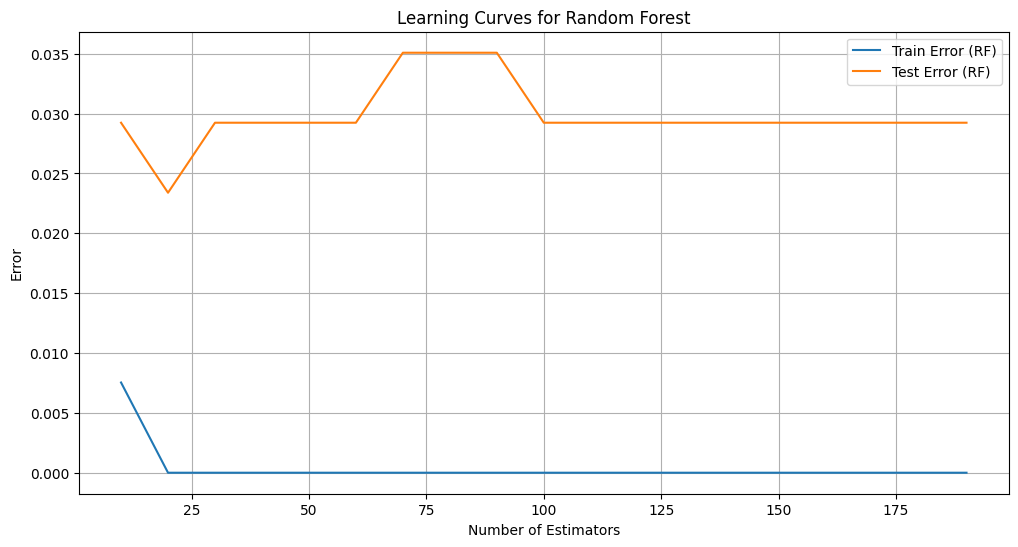

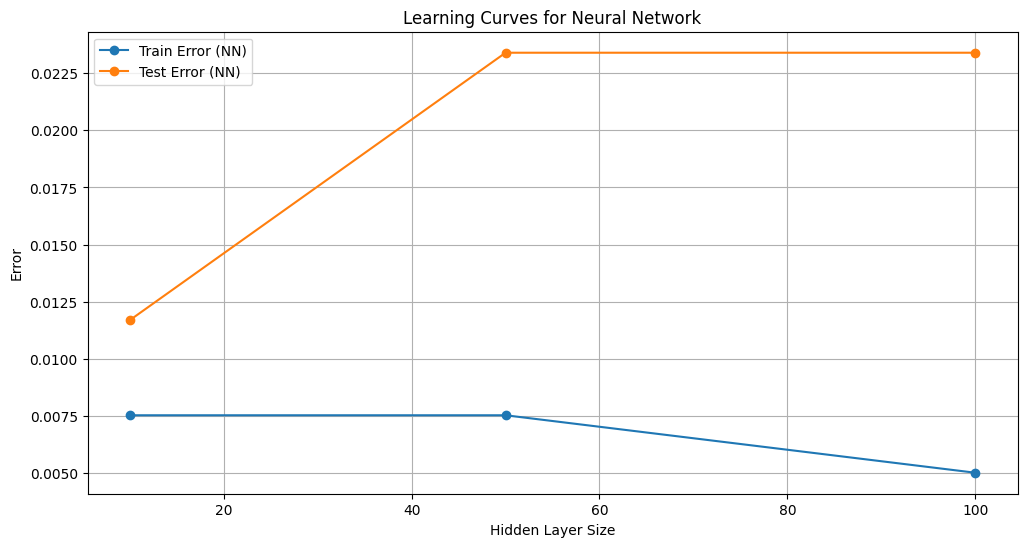

In [39]:
import matplotlib.pyplot as plt

# Plot learning curves for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, train_errors_rf, label='Train Error (RF)')
plt.plot(n_estimators_range, test_errors_rf, label='Test Error (RF)')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Plot learning curves for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(hidden_layer_sizes, train_errors_nn, label='Train Error (NN)', marker='o')
plt.plot(hidden_layer_sizes, test_errors_nn, label='Test Error (NN)', marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Error')
plt.title('Learning Curves for Neural Network')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Classifier:")
print(f"Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")

# Neural Network Classifier
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

y_train_pred_nn = nn.predict(X_train)
y_test_pred_nn = nn.predict(X_test)

train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)

print("\nNeural Network Classifier:")
print(f"Training Accuracy: {train_accuracy_nn:.4f}")
print(f"Test Accuracy: {test_accuracy_nn:.4f}")

Random Forest Classifier:
Training Accuracy: 1.0000
Test Accuracy: 0.9708

Neural Network Classifier:
Training Accuracy: 0.9950
Test Accuracy: 0.9766
